## DAY 4.1

### Afternoon Session

In [33]:
#importing necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
data = pd.read_csv('/content/predict_energy_consumption 1.xls')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [35]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [36]:
#FEATURE AND TARGET SELECTION
X = data[['temperature','humidity','wind_speed','solar_irradiance']]
y = data['energy_consumption'].values

In [37]:
#split the dataset
Xtr, Xte, ytr, yte = train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
#Standradize the data
ss = StandardScaler()
Xtr = ss.fit_transform(Xtr)
Xte = ss.transform(Xte)

In [39]:
#create a neural network
model = Sequential([
    Dense(64,activation='relu',input_shape=(Xtr.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
                   ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
#compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [41]:
#train the model
history = model.fit(Xtr,ytr,epochs=30,batch_size=32,validation_split=0.2,verbose=2)

Epoch 1/30
20/20 - 2s - 83ms/step - loss: 90352.0312 - mae: 271.6773 - val_loss: 83648.4062 - val_mae: 258.9016
Epoch 2/30
20/20 - 0s - 5ms/step - loss: 89798.2969 - mae: 270.6787 - val_loss: 83069.0859 - val_mae: 257.7667
Epoch 3/30
20/20 - 0s - 10ms/step - loss: 89033.2031 - mae: 269.2572 - val_loss: 82184.7031 - val_mae: 256.0208
Epoch 4/30
20/20 - 1s - 27ms/step - loss: 87842.0781 - mae: 267.0655 - val_loss: 80851.0078 - val_mae: 253.3705
Epoch 5/30
20/20 - 0s - 15ms/step - loss: 86077.6641 - mae: 263.7326 - val_loss: 78866.6484 - val_mae: 249.3709
Epoch 6/30
20/20 - 0s - 18ms/step - loss: 83490.7109 - mae: 258.8014 - val_loss: 76024.6719 - val_mae: 243.5295
Epoch 7/30
20/20 - 1s - 38ms/step - loss: 79877.4062 - mae: 251.7288 - val_loss: 72139.7500 - val_mae: 235.2961
Epoch 8/30
20/20 - 0s - 22ms/step - loss: 75080.0469 - mae: 241.9571 - val_loss: 67142.0625 - val_mae: 224.2982
Epoch 9/30
20/20 - 0s - 18ms/step - loss: 69074.5625 - mae: 229.2387 - val_loss: 61114.4492 - val_mae: 21

In [43]:
test_loss,test_mae = model.evaluate(Xte,yte,verbose=1)
print(f'Test Mean Abosolute Error is {test_mae:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 18446.9277 - mae: 116.0028
Test Mean Abosolute Error is 115.99


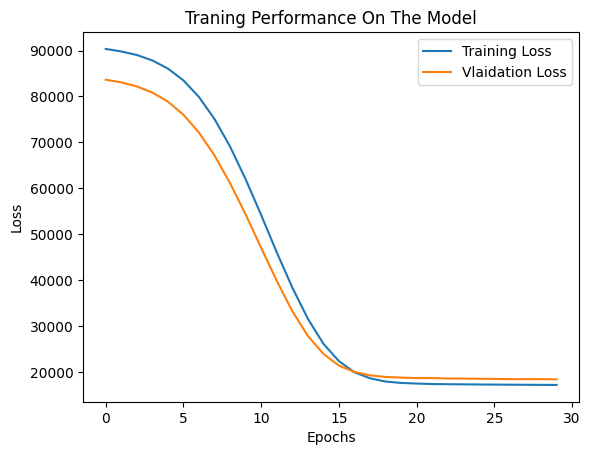

In [50]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Vlaidation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Traning Performance On The Model')
plt.legend()
plt.show()

In [52]:
predictions = model.predict(Xte)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[279.39987],
       [256.55023],
       [252.27478],
       [197.2945 ],
       [347.02594],
       [325.12622],
       [327.18433],
       [299.3537 ],
       [270.21902],
       [270.08954],
       [233.80826],
       [268.6021 ],
       [282.83423],
       [236.74509],
       [297.9905 ],
       [291.73392],
       [261.33408],
       [311.85852],
       [281.79358],
       [238.46112],
       [278.79608],
       [284.78265],
       [269.56134],
       [279.0463 ],
       [238.83473],
       [230.55954],
       [256.3282 ],
       [319.2797 ],
       [293.38864],
       [267.68103],
       [221.74387],
       [299.0144 ],
       [280.45935],
       [270.51593],
       [324.4607 ],
       [288.44388],
       [207.70244],
       [264.43695],
       [275.81433],
       [235.40826],
       [245.86684],
       [249.39542],
       [245.26176],
       [252.30681],
       [254.98978],
       [258.07892],
       [258.99487],
       [258.0265 ],
       [275.6837 ],
       [302.82654],


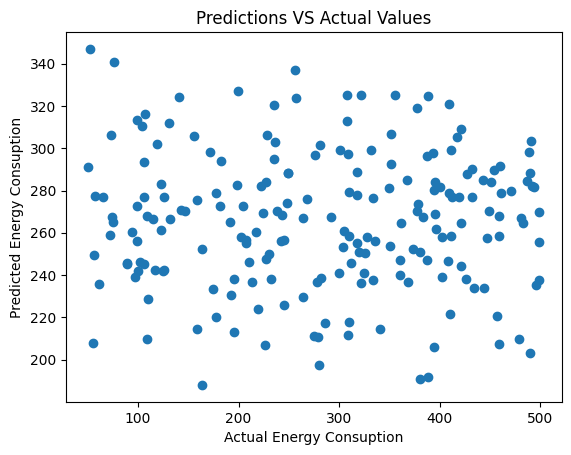

In [53]:
plt.scatter(yte,predictions)
plt.xlabel('Actual Energy Consuption')
plt.ylabel('Predicted Energy Consuption')
plt.title('Predictions VS Actual Values')
plt.show()